In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [14]:
df = pd.read_csv("cleaned_dataset.csv")

In [15]:
df.shape

(312, 6)

<Axes: xlabel='rating_category'>

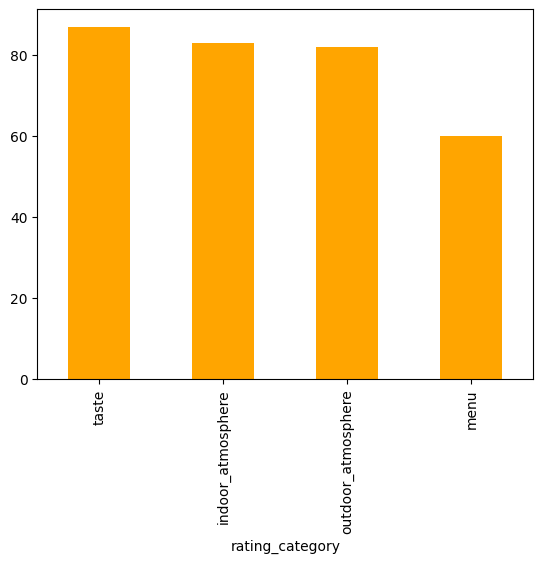

In [16]:
df['rating_category'].value_counts()
df['rating_category'].value_counts().plot(kind='bar', color='orange')

The graph shows a **relatively even distribution** across taste, indoor atmosphere, and outdoor atmosphere, with only a slight drop for menu. The trend suggests that customers value all aspects fairly equally, though **taste and atmosphere stand out slightly more** than menu variety and pricing.


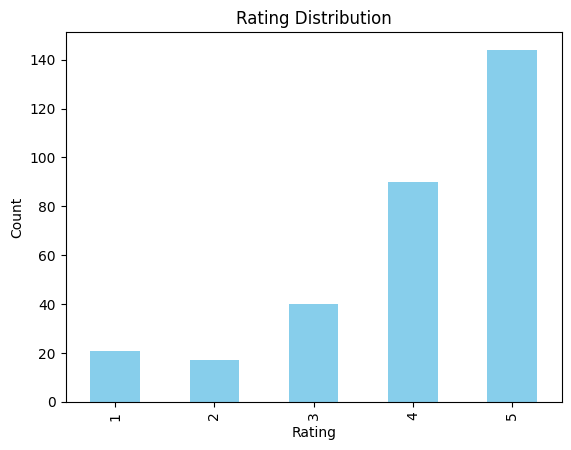

In [17]:
#rating distribution
df['rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

The graph shows a **clear upward trend**, with counts steadily increasing from rating 1 to rating 5. This indicates that the majority of customers gave **high ratings**, suggesting overall positive satisfaction with the experience.

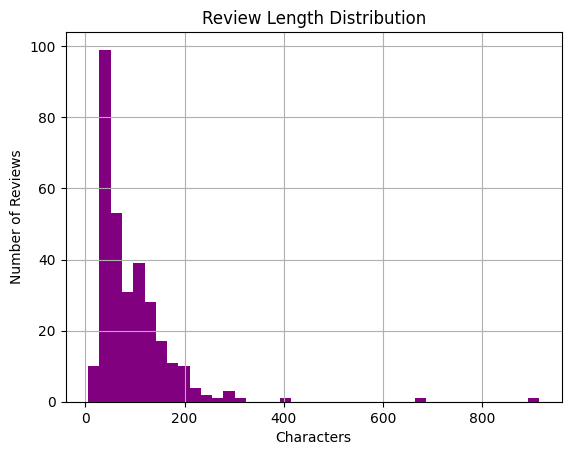

,rating,review_length
rating,1.000000,0.049868
review_length,0.049868,1.000000


In [18]:
#review length
df['review_length'] = df['text'].str.len()

df['review_length'].hist(bins=40, color='purple')
plt.title("Review Length Distribution")
plt.xlabel("Characters")
plt.ylabel("Number of Reviews")
plt.show()

# Correlation with rating?
df[['rating', 'review_length']].corr()

The distribution shows that **most reviews are short**, clustered below 200 characters, with the highest concentration under 100 characters. A few outliers with much longer lengths exist, but they are rare, indicating that customers generally leave concise feedback.


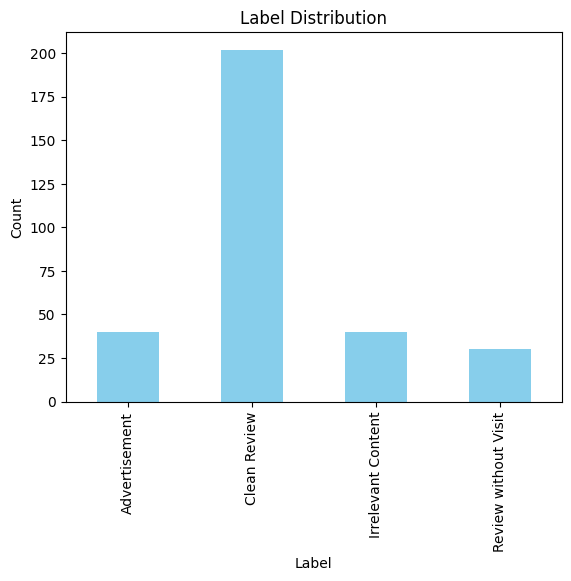

In [19]:
# label distribution
df['label'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

The graph shows that **Clean Reviews dominate the dataset**, far outnumbering the other categories. In contrast, **Advertisement, Irrelevant Content, and Rant without Visit** appear in much smaller but relatively similar amounts, indicating a strong class imbalance.

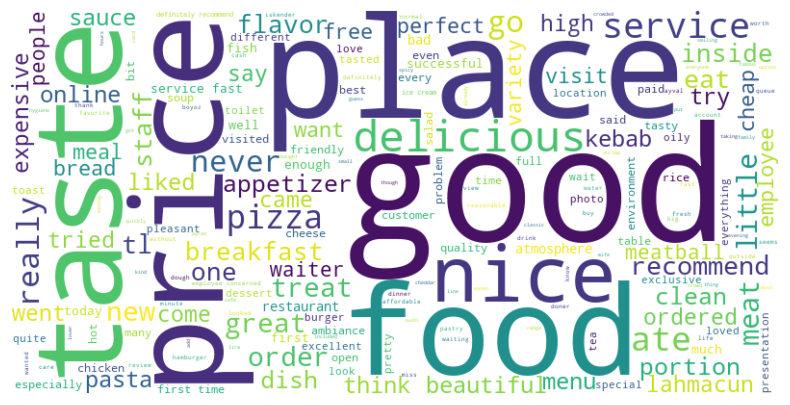

In [20]:
# most used words
# Join all processed text into one big string
text = " ".join(df["processed_text"].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The word cloud highlights that terms like **“good,” “place,” “food,” “taste,”** and **“nice”** dominate customer reviews, showing an overall positive tone. Other frequent words such as **“service,” “delicious,” and “staff”** suggest that customers often comment on both the quality of food and the dining experience.